# Linear Regression

In this notebook, I'll walk you through the theory and example of linear regression with one variable to predict profits for a restaurant franchise.


# Outline
- [ 1 - Problem Statement ](#1)
- [ 2 - Dataset ](#2)
- [ 3 - Goal ](#3)



<a name="1"></a>
## 1 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

<a name="2"></a>
## 2 - Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [1]:
# All required imports
import numpy as np
import matplotlib.pyplot as plt
import util
import copy
import math
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
# Take a quick look at the data
x_train, y_train = util.load_restaurant_data()
print(f'Dimension of x_train: {x_train.shape}, first 5 data from x_train: {x_train[:5]}')
print(f'Dimension of y_train: {y_train.shape}, first 5 data from y_train: {y_train[:5]}')

Dimension of x_train: (97,), first 5 data from x_train: [6.1101 5.5277 8.5186 7.0032 5.8598]
Dimension of y_train: (97,), first 5 data from y_train: [17.592   9.1302 13.662  11.854   6.8233]


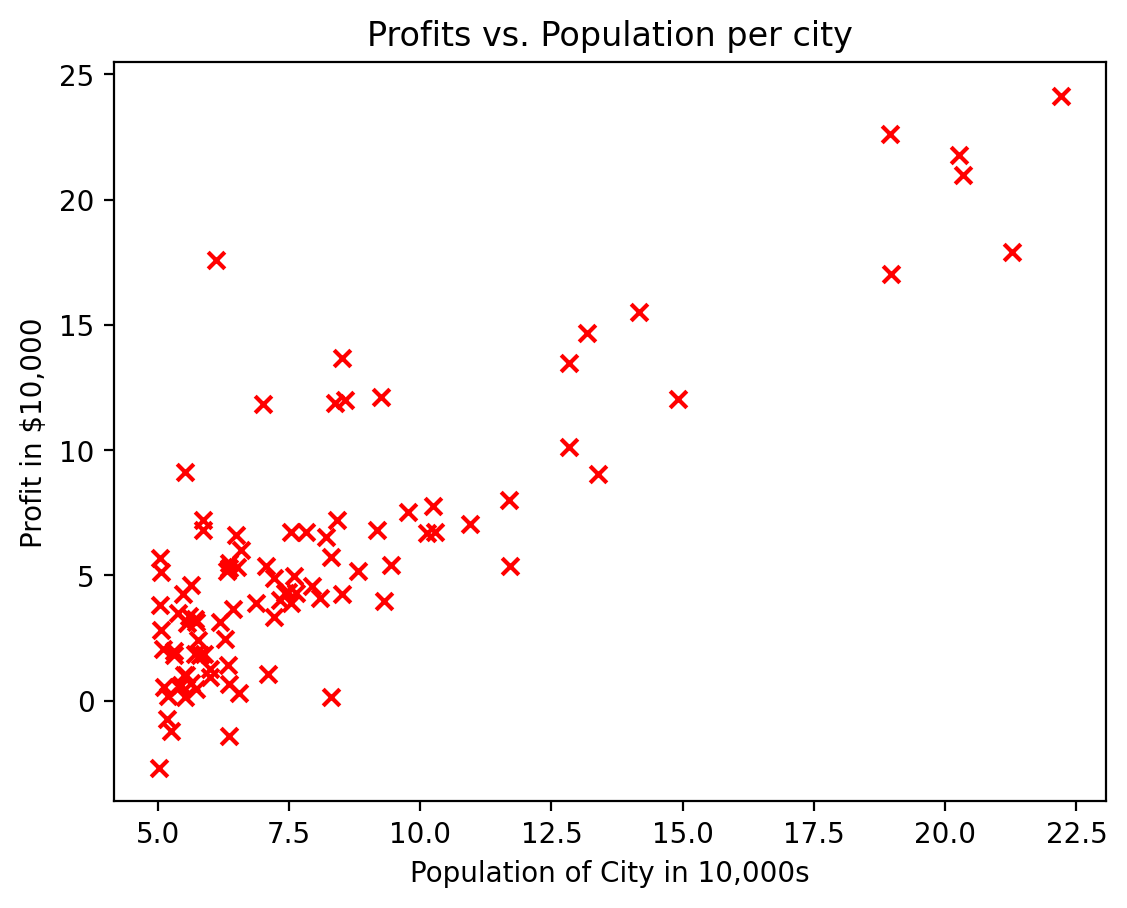

In [3]:
# A quick plot to take another look at the data
# Used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")

# Set the y-axis label
plt.ylabel('Profit in $10,000')

# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

<a name="3"></a>
## 3 -  Goal
Your goal is to build a linear regression model to fit this data.
- With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

<a name="4"></a>
## 4 - Linear regression

You will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (your restaurant's monthly profit for that city) is represented as 
    $$f_{w,b}(x) = wx + b$$
    



- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
For one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

`compute_cost()` function below is to compute the cost $J(w,b)$.

In [4]:
def compute_cost(x: np.ndarray, y: np.ndarray, w: float, b: float, log:int = None) -> float:
    """
    compute cost
    Args:
      x (ndarray (m,)) : Data, m examples with just 1 feature
      y (ndarray (m,)) : target values
      w, b (scalar)    : model parameters
      log (scalar)     : if not None, then prints @log lines of data as a table

    Returns:
      total_cost (float): The cost of using w,b as the parameters for linear regression 
                          to fit the data points in x and y
    """
    f_wb: np.ndarray = w * x + b  # it contains w.x + b for all m examples
    error = f_wb - y  # errors for all m examples
    m = x.shape[0]
    error2 = error**2;
    
    if log:
        util.print_table(rows=log, x=x_train, f_wb=f_wb, y=y_train, error=error, error2=error2,
                         progressive_cost=np.cumsum(error2)/(2*np.arange(1, m+1)))
        
        
    return np.sum(error2) / (2 * m)

In [5]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b, log=10)
print(f'Cost with w={initial_w}, b={initial_b} is: {cost}')

+-------+--------+--------+--------+---------+------------------+
|   x   |  f_wb  |   y    | error  |  error2 | progressive_cost |
+-------+--------+--------+--------+---------+------------------+
| 6.110 | 13.220 | 17.592 | -4.372 |  19.113 |      9.556       |
| 5.528 | 12.055 | 9.130  | 2.925  |  8.557  |      6.917       |
| 8.519 | 18.037 | 13.662 | 4.375  |  19.142 |      7.802       |
| 7.003 | 15.006 | 11.854 | 3.152  |  9.938  |      7.094       |
| 5.860 | 12.720 | 6.823  | 5.896  |  34.766 |      9.152       |
| 8.383 | 17.766 | 11.886 | 5.880  |  34.572 |      10.507      |
| 7.476 | 15.953 | 4.348  | 11.604 | 134.664 |      18.625      |
| 8.578 | 18.156 |   12   | 6.156  |  37.899 |      18.666      |
| 6.486 | 13.972 | 6.599  | 7.374  |  54.371 |      19.612      |
| 5.055 | 11.109 | 3.817  | 7.293  |  53.182 |      20.310      |
+-------+--------+--------+--------+---------+------------------+
Cost with w=2, b=1 is: 75.20338497891959


<a name="5"></a>
## 5 - Gradient Descent 
In Gradient descent, we try to minimize the cost. To do so, we must find the minima of cost. But how do you find the minima of any general curve?


<a name="5.1"></a>
### 5.1 - Intuition of Gradient Descent 
Let's consider a a simple quadratic plot, and try to reach its minima from its either end

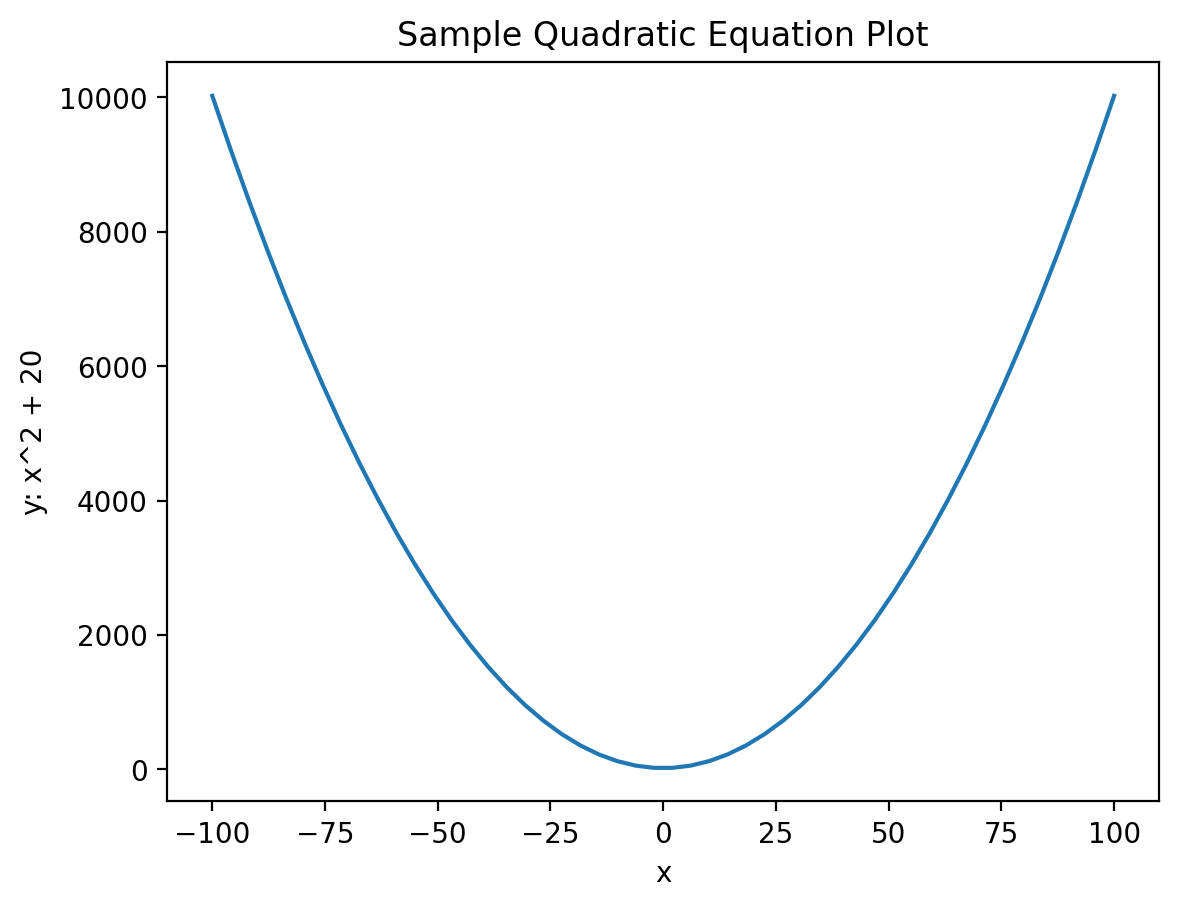

In [6]:
# Intuition

def quadratic_equation(x):
    return x**2 + 20

def slope(x):
    return 2*x

xi = np.linspace(-100, 100, 50)
yi = quadratic_equation(xi)
plt.plot(xi, yi)

plt.xlabel('x')
plt.ylabel('y: x^2 + 20')
plt.title('Sample Quadratic Equation Plot')

plt.show()

+---------+---------+---------+
|    xs   |    ys   |  slopes |
+---------+---------+---------+
|   -100  |  10020  |   -200  |
|   -60   |   3620  |   -120  |
|   -36   |   1316  |   -72   |
| -21.600 | 486.560 | -43.200 |
| -12.960 | 187.962 | -25.920 |
|  -7.776 |  80.466 | -15.552 |
|  -4.666 |  41.768 |  -9.331 |
|  -2.799 |  27.836 |  -5.599 |
|  -1.680 |  22.821 |  -3.359 |
|  -1.008 |  21.016 |  -2.016 |
|  -0.605 |  20.366 |  -1.209 |
|  -0.363 |  20.132 |  -0.726 |
|  -0.218 |  20.047 |  -0.435 |
|  -0.131 |  20.017 |  -0.261 |
|  -0.078 |  20.006 |  -0.157 |
|  -0.047 |  20.002 |  -0.094 |
|  -0.028 |  20.001 |  -0.056 |
|  -0.017 |  20.000 |  -0.034 |
|  -0.010 |  20.000 |  -0.020 |
|  -0.006 |  20.000 |  -0.012 |
+---------+---------+---------+


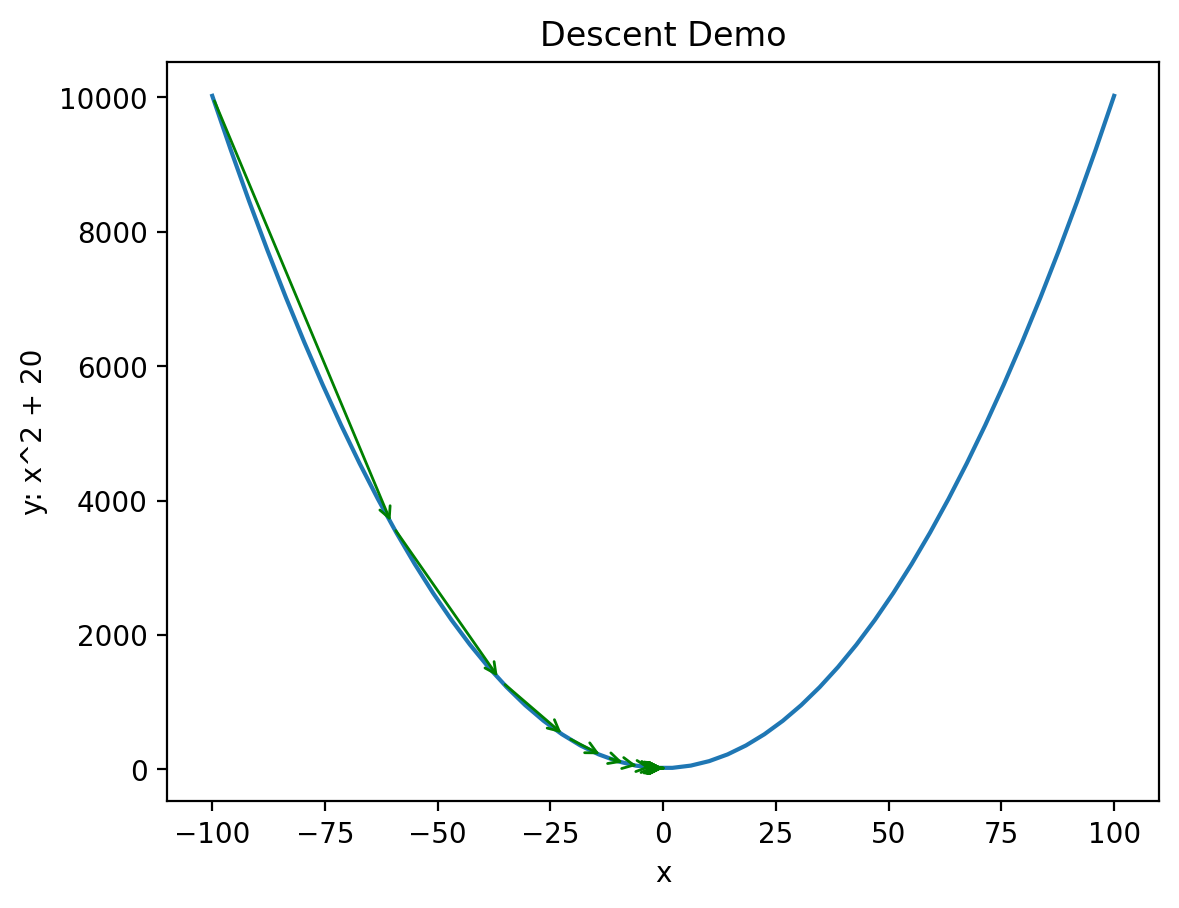

In [7]:
# Intuition continued

def show_descent(start_x, alpha, steps=10, color='r'):
    xs = []
    ys = []
    slopes = []
    for i in range(steps):
        
        new_x = start_x - alpha * slope(start_x)  # key logic

        start_y = quadratic_equation(start_x)
        new_y = quadratic_equation(new_x)

        plt.annotate("", xy=(new_x,new_y), xytext=(start_x, start_y), arrowprops=dict(arrowstyle="->", color=color))

        xs.append(start_x)
        ys.append(start_y)
        slopes.append(slope(start_x))
        start_x = new_x

    return xs, ys, slopes

fig = plt.figure()
plt.plot(xi, yi)
xs, ys, slopes = show_descent(xi[0], 0.2, color='g', steps=20)
util.print_table(xs=xs, ys=ys, slopes=slopes, rows=len(xs))
# show_descent(xi[-1], 0.08, color='r')

plt.xlabel('x')
plt.ylabel('y: x^2 + 20')
plt.title('Descent Demo')
plt.show()
fig.savefig('descent_demo.svg')

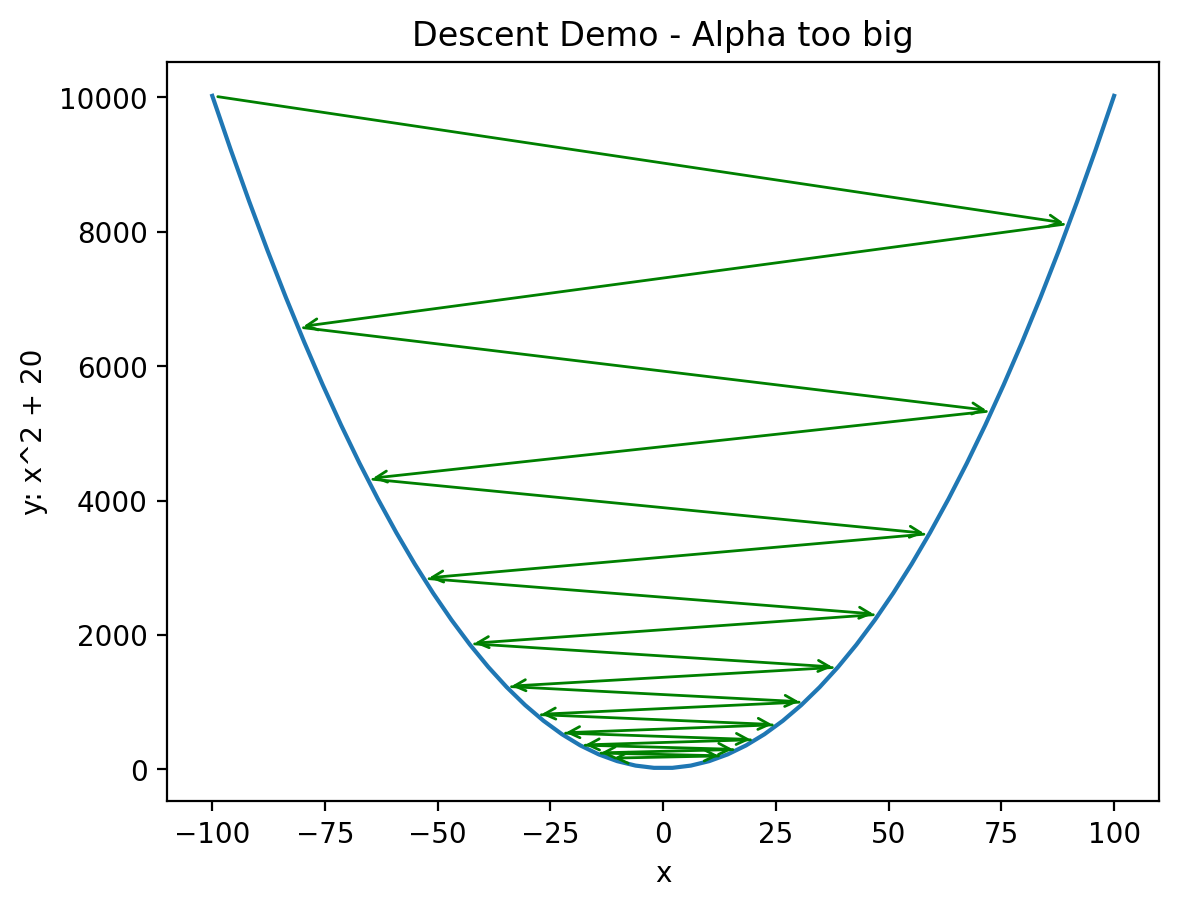

In [8]:
# Intuition continued - Alpha too big
plt.plot(xi, yi)
xs, ys, slopes = show_descent(xi[0], 0.95, color='g', steps=20)
# util.print_table(xs=xs, ys=ys, slopes=slopes, rows=len(xs))

plt.xlabel('x')
plt.ylabel('y: x^2 + 20')
plt.title('Descent Demo - Alpha too big')
plt.show()


<a name="5.2"></a>
### 5.2 - Gradient Descent Algorithm
Gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

In [9]:
def compute_gradient(x, y, w, b, log: int = None):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray)  : Shape (m,) Input to the model (Population of cities) 
      y (ndarray)  : Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
      log (int)    : if True, logs @log details
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
            
    f_wb  = w * x + b
    error = f_wb - y
    m = x.shape[0]

    error_x_train = error * x

    if log:
        util.print_table(x_train=x, f_wb=f_wb, y_train=y, error=error, error_x_train=error_x_train,
                         progressive_dj_dw=np.cumsum(error_x_train) / np.arange(1, m+1), rows=log)

    return np.sum(error_x_train) / m, np.sum(error) / m

In [10]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b, log=10)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

+---------+------+---------+---------+---------------+-------------------+
| x_train | f_wb | y_train |  error  | error_x_train | progressive_dj_dw |
+---------+------+---------+---------+---------------+-------------------+
|  6.110  |  0   |  17.592 | -17.592 |    -107.489   |      -107.489     |
|  5.528  |  0   |  9.130  |  -9.130 |    -50.469    |      -78.979      |
|  8.519  |  0   |  13.662 | -13.662 |    -116.381   |      -91.446      |
|  7.003  |  0   |  11.854 | -11.854 |    -83.016    |      -89.339      |
|  5.860  |  0   |  6.823  |  -6.823 |    -39.983    |      -79.468      |
|  8.383  |  0   |  11.886 | -11.886 |    -99.639    |      -82.830      |
|  7.476  |  0   |  4.348  |  -4.348 |    -32.510    |      -75.641      |
|  8.578  |  0   |    12   |   -12   |    -102.937   |      -79.053      |
|  6.486  |  0   |  6.599  |  -6.599 |    -42.800    |      -75.025      |
|  5.055  |  0   |  3.817  |  -3.817 |    -19.291    |      -69.452      |
+---------+------+-------

In [11]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b, log=10)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

+---------+-------+---------+---------+---------------+-------------------+
| x_train |  f_wb | y_train |  error  | error_x_train | progressive_dj_dw |
+---------+-------+---------+---------+---------------+-------------------+
|  6.110  | 1.422 |  17.592 | -16.170 |    -98.800    |      -98.800      |
|  5.528  | 1.306 |  9.130  |  -7.825 |    -43.252    |      -71.026      |
|  8.519  | 1.904 |  13.662 | -11.758 |    -100.164   |      -80.739      |
|  7.003  | 1.601 |  11.854 | -10.253 |    -71.806    |      -78.506      |
|  5.860  | 1.372 |  6.823  |  -5.451 |    -31.944    |      -69.193      |
|  8.383  | 1.877 |  11.886 | -10.009 |    -83.908    |      -71.646      |
|  7.476  | 1.695 |  4.348  |  -2.653 |    -19.835    |      -64.244      |
|  8.578  | 1.916 |    12   | -10.084 |    -86.505    |      -67.027      |
|  6.486  | 1.497 |  6.599  |  -5.101 |    -33.089    |      -63.256      |
|  5.055  | 1.211 |  3.817  |  -2.606 |    -13.171    |      -58.247      |
+---------+-

In [12]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after running gradient descent
      b : (scalar)              Updated value of parameter of the model after running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  compute_cost(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [13]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.6302914394043597


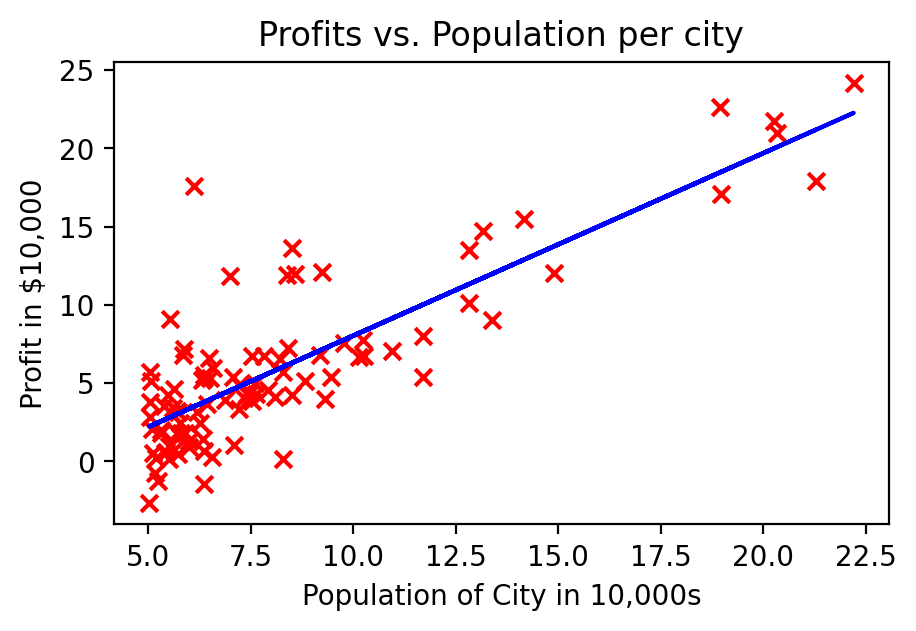

In [14]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b


fig = plt.figure(figsize=(5, 3))
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()